In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf  
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.mixed_precision import set_global_policy
import os
from PIL import Image


In [2]:
#tf.config.set_visible_devices([], 'GPU')  # This hides all GPUs from TensorFlow.

# Now when you use TensorFlow, it will only use the CPU.

In [3]:
tf.keras.backend.clear_session()
set_global_policy('mixed_float16')
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU, compute capability 8.6


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to only allocate a specific amount of memory on the first GPU
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Adjust the memory limit as appropriate
#     except RuntimeError as e:
#         print(e)

In [5]:
import os
from PIL import Image
import numpy as np

# Define the path to the directory containing the folders
base_path = '../Preprocessed Dataset'

# List the folders in the directory
folders = ['IBM Plex Sans Arabic', 'Lemonada', 'Marhey', 'Scheherazade New']

# Create a dictionary to hold the labels for each folder
labels = {folder: i for i, folder in enumerate(folders)}

# Prepare a list to store the image data and labels
data = []

# Loop through each folder and each image within the folder
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):  # assuming the images are in PNG format
            image_path = os.path.join(folder_path, filename)
            # Load the image
            image = Image.open(image_path)
            # Optionally, convert the image to 'L' to ensure it's in grayscale
            if image.mode != 'L':
                image = image.convert('L')
            # Convert image data to array
            image_data = np.array(image)
            # Binarize the image data (0 or 1) directly instead of normalization to [0, 1] range
            image_data = (image_data > 127).astype(np.uint8)  # Assuming binary threshold at the middle (127)
            # Append the image data and label to the list
            data.append((image_data, labels[folder]))

# Now, 'data' contains tuples of (image_data, label) where image_data are integers (0 or 1)


In [6]:
len(data)

3997

In [7]:
# Assuming 'data' is the list that contains all your images and their labels
# Separate data into two lists: features and labels
data, labels = zip(*data)

# Convert these lists to numpy arrays for compatibility with sklearn
data = np.array(data)
labels = np.array(labels)

# Split the data using sklearn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
data = 1
labels = 1

# Check the size of the training and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 3197
Test set size: 800


In [8]:
X_train[0].shape

(300, 300)

In [9]:
model = Sequential([
    # First convolution layer with input shape specified as (300, 300, 1)
    Conv2D(32, (5, 5), activation='relu', input_shape=(300, 300, 1)),
    MaxPooling2D((2, 2)),
    
    # Second convolution layer
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Third convolution layer
    Conv2D(48, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Fourth convolution layer
    Conv2D(48, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Fifth convolution layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flattening the output of the last pooling layer to feed it into the dense layer
    Flatten(),
    
    # Dense layers with dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output layer with softmax activation for multi-class classification
    Dense(4, activation='softmax')
])


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
100/100 [==============================] - 17s 98ms/step - loss: 1.3863 - accuracy: 0.2477
Epoch 2/20
100/100 [==============================] - 9s 88ms/step - loss: 1.1663 - accuracy: 0.4210
Epoch 3/20
100/100 [==============================] - 9s 88ms/step - loss: 0.8760 - accuracy: 0.5652
Epoch 4/20
100/100 [==============================] - 9s 88ms/step - loss: 0.6552 - accuracy: 0.6656
Epoch 5/20
100/100 [==============================] - 9s 88ms/step - loss: 0.5873 - accuracy: 0.7116
Epoch 6/20
100/100 [==============================] - 9s 88ms/step - loss: 0.4913 - accuracy: 0.7582
Epoch 7/20
100/100 [==============================] - 9s 88ms/step - loss: 0.3453 - accuracy: 0.8499
Epoch 8/20
100/100 [==============================] - 9s 88ms/step - loss: 0.2025 - accuracy: 0.9274
Epoch 9/20
100/100 [==============================] - 9s 88ms/step - loss: 0.1331 - accuracy: 0.9550
Epoch 10/20
100/100 [==============================] - 9s 88ms/step - loss: 0.0854 - accur

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


25/25 [==============================] - 1s 33ms/step - loss: 0.1551 - accuracy: 0.9712
Test accuracy: 97.12%


25/25 [==============================] - 1s 39ms/step


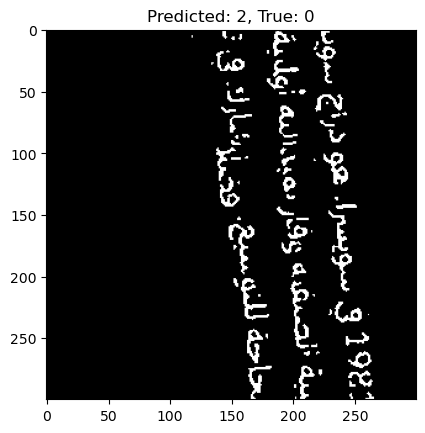

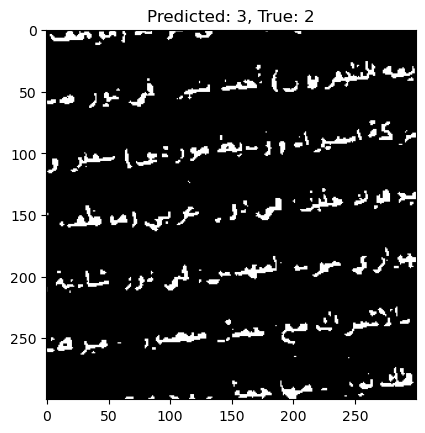

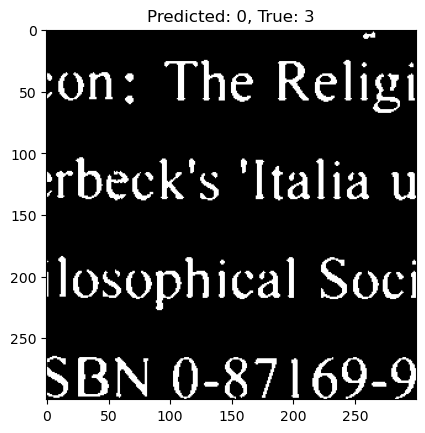

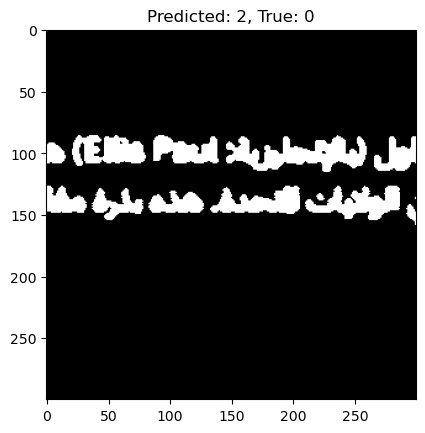

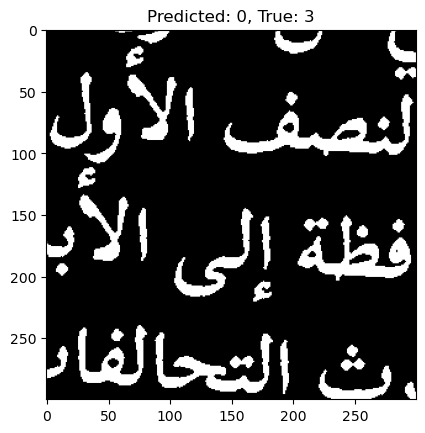

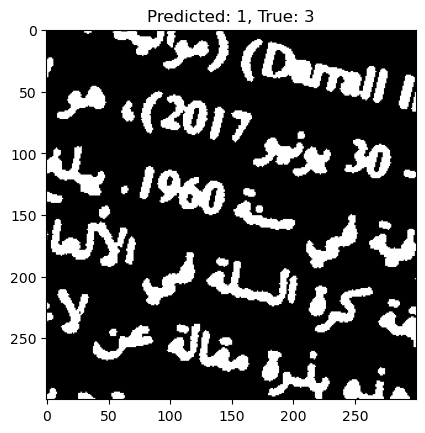

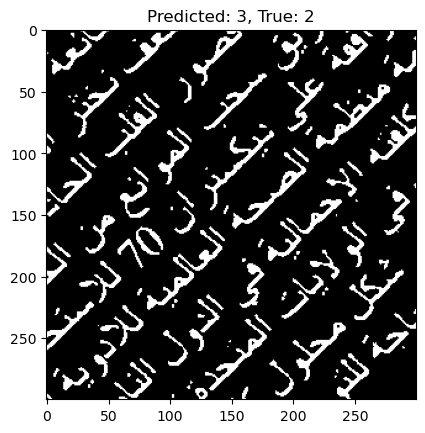

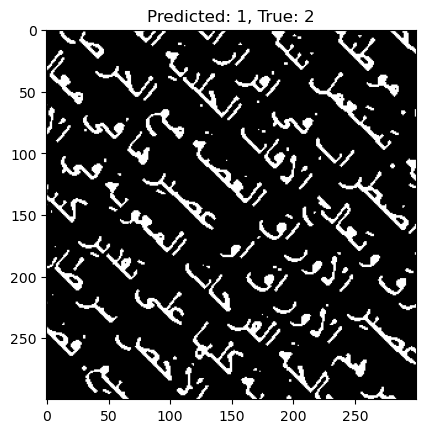

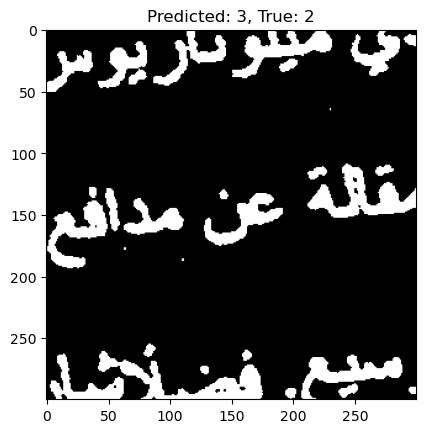

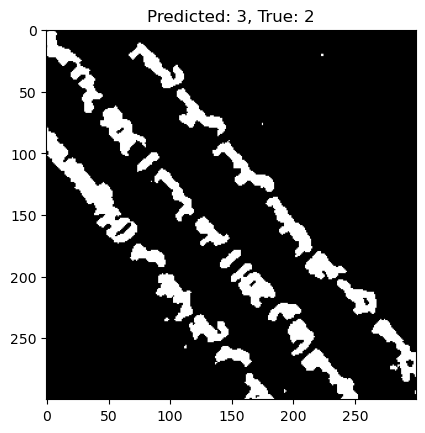

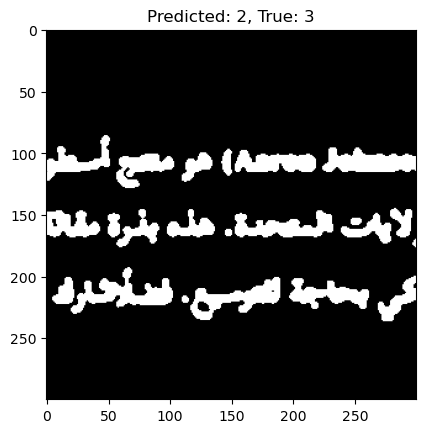

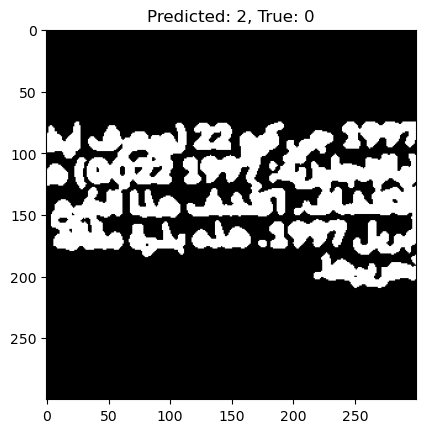

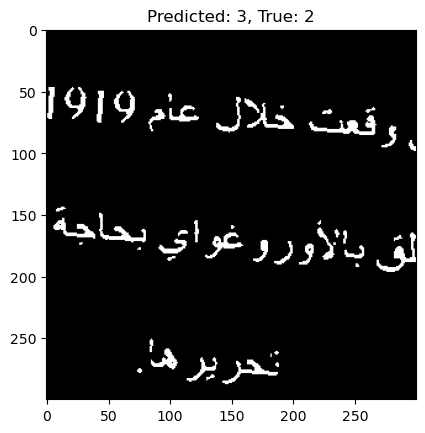

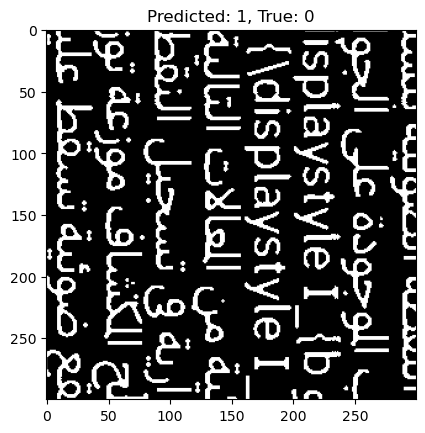

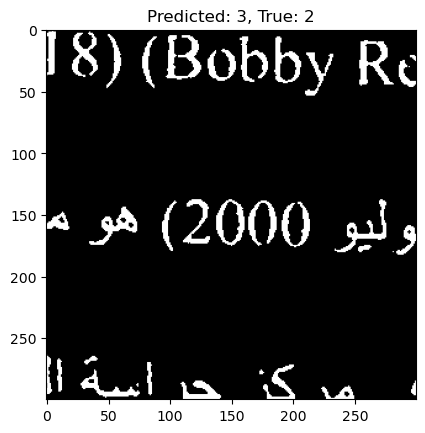

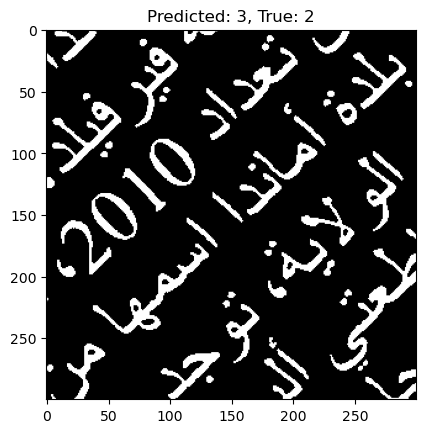

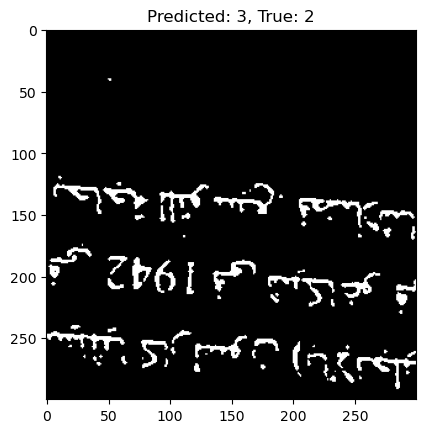

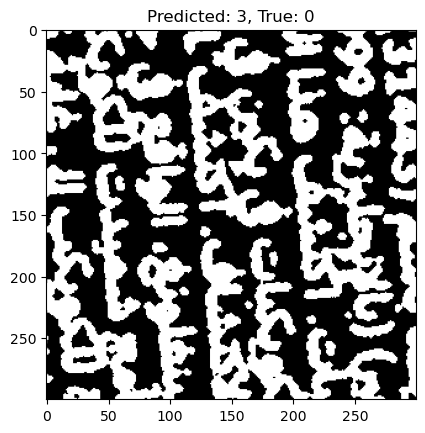

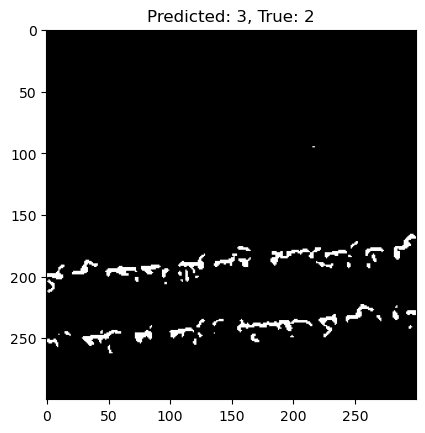

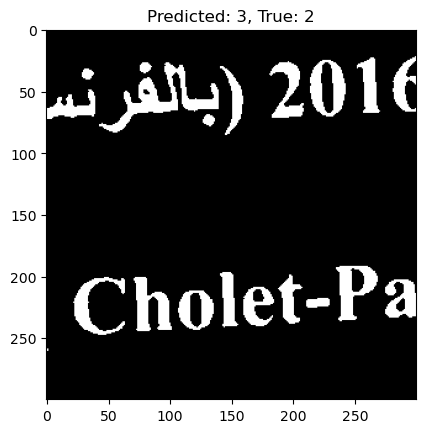

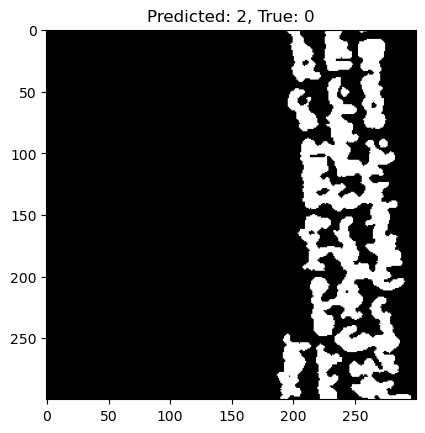

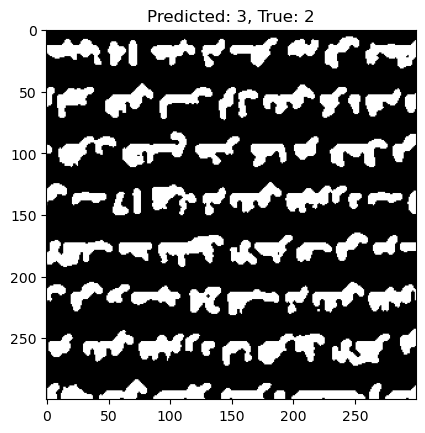

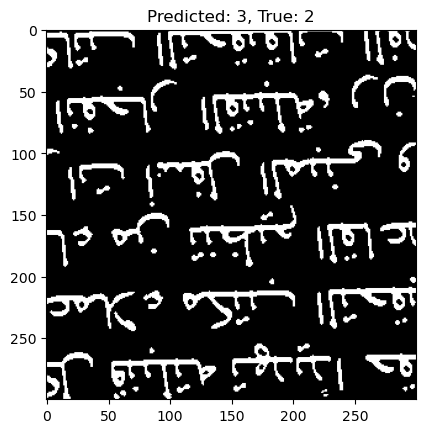

In [15]:
# Predict the classes using the model on the test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Identify where predicted classes don't match the actual labels
incorrect_indices = np.where(predicted_classes != y_test)[0]

# Extract the incorrectly classified images
incorrect_images = X_test[incorrect_indices]

# You can also extract the predicted and true labels for further analysis or display
incorrect_labels_predicted = predicted_classes[incorrect_indices]
incorrect_labels_true = y_test[incorrect_indices]

# Optional: Display some of the incorrect images
import matplotlib.pyplot as plt

# Display the first few incorrectly classified images
for i, img in enumerate(incorrect_images):
    plt.figure()
    plt.imshow(img.reshape(300, 300), cmap='gray')  # Reshape if necessary and use appropriate color map
    plt.title(f'Predicted: {incorrect_labels_predicted[i]}, True: {incorrect_labels_true[i]}')
    plt.show()

[[0.8180153  0.53326946 0.54103446 0.6039225  0.29890922]
 [0.47857898 0.5489015  0.7071147  0.34949532 0.35139528]
 [0.5068074  0.31120166 0.5721823  0.56506264 0.7903313 ]
 [0.41684875 0.35291776 0.40186352 0.35255465 0.60154366]
 [0.58765763 0.43039036 0.2779355  0.6798316  0.8784416 ]]
[[0.49723193 0.03536303 0.46857724 0.64767134 0.87171334]
 [0.639389   0.42820314 0.3469202  0.7298574  0.68868595]
 [0.6663569  0.20207308 0.6828255  0.48806506 0.52160126]
 [0.6200376  0.2634064  0.56590474 0.4647995  0.6391045 ]
 [0.3709624  0.62783474 0.26197633 0.46291378 0.21695508]]
[[0.877197   0.49540302 0.77248275 0.2825862  0.34537834]
 [0.65251905 0.07576482 0.3696033  0.2705401  0.632456  ]
 [0.76746297 0.31812978 0.49126956 0.4654464  0.573671  ]
 [0.782781   0.47152007 0.42528266 0.51853335 0.5941174 ]
 [0.55720115 0.5888303  0.6087802  0.39715558 0.52922   ]]
[[0.61042225 0.75613743 0.4301396  0.4939492  0.51519483]
 [0.58185333 0.79357386 0.4745284  0.73696214 0.63940597]
 [0.6468758

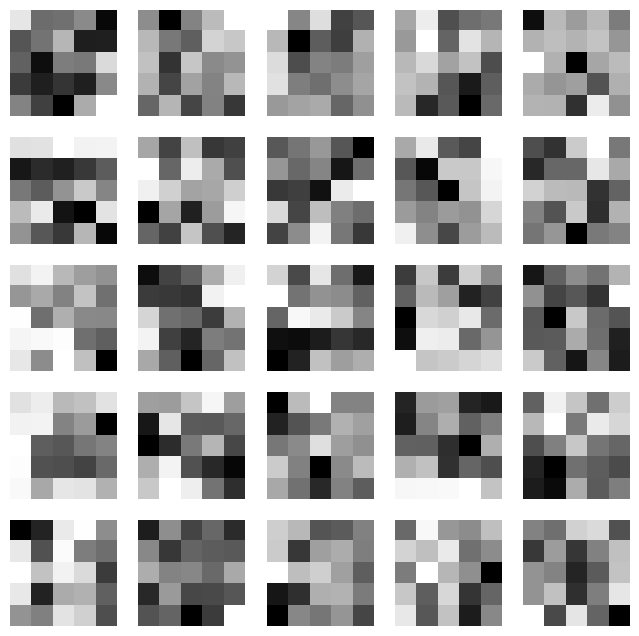

In [14]:
# Extract the weights from the first convolutional layer
# Assuming the first layer of the model is the convolutional layer as in your provided model architecture
filters, biases = model.layers[0].get_weights()

# Normalize filter values to 0-1 so you can visualize them well
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

import matplotlib.pyplot as plt

# Number of filters in the first layer
num_filters = filters.shape[3]

# Set up the grid for plotting
fig, axes = plt.subplots(nrows=int(np.sqrt(num_filters)), ncols=int(np.sqrt(num_filters)),
                         figsize=(8, 8))  # Adjust the figure size as needed

# Plot each filter
for i, ax in enumerate(axes.flat):
    # Only plot the valid number of filters
    if i < num_filters:
        # Get the filter
        f = filters[:, :, 0, i]
        print(f)

        # Plot filter channel in grayscale
        ax.imshow(f, cmap='gray')
        ax.axis('off')

# Show the plot
plt.show()
